In [1]:
import numpy as np

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [2]:
train_dataset = torchvision.datasets.MNIST(
    root='data/',
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

X_train = train_dataset.data.view(-1, 784)
y_train = train_dataset.targets.view(-1, 1)


In [3]:
test_dataset = torchvision.datasets.MNIST(
    root='data/',
    train=False,
    transform=transforms.ToTensor(),
    download=True,
)

X_test = test_dataset.data.view(-1, 784)
y_test = test_dataset.targets.view(-1, 1)

In [4]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Available device: {}'.format(device))

model.to(device)

Available device: cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [7]:
# from torch.utils.data import DataLoader

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=32,
    shuffle=False,
)

In [8]:
n_epoch = 50

train_losses = np.zeros(n_epoch)
test_losses = np.zeros(n_epoch)
train_accuracy = np.zeros(n_epoch)
test_accuracy = np.zeros(n_epoch)

for it in range(n_epoch):
    
    epoch_train_losses = []
    epoch_test_losses = []
    
    n_correct_train = 0
    n_total_train = 0
    n_correct_test = 0
    n_total_test = 0
    
    for (inputs, labels) in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        inputs = inputs.view(-1, 784)        
        outputs = model(inputs)
        
        optimizer.zero_grad()
        
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        epoch_train_losses.append(loss.item())
        
        _, predictions = torch.max(outputs, 1)
        n_correct_train += (predictions == labels).sum().item()
        n_total_train += labels.shape[0]
        
    train_accuracy[it] = n_correct_train/n_total_train
    train_losses[it] = np.mean(epoch_train_losses)
        
    for (inputs, labels) in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        inputs = inputs.view(-1, 784)
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        
        epoch_test_losses.append(loss.item())
        
        _, predictions = torch.max(outputs, 1)
        n_correct_test += (predictions == labels).sum().item()
        n_total_test += labels.shape[0]
        
    test_accuracy[it] = n_correct_test/n_total_test
    test_losses[it] = np.mean(epoch_test_losses)

    print('Epoch {}/{}'.format(it+1, n_epoch))

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


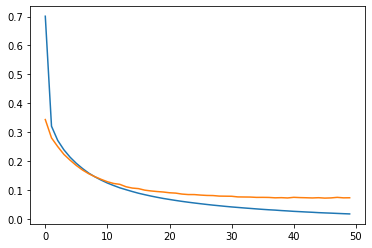

In [13]:
plt.plot(train_losses)
plt.plot(test_losses)

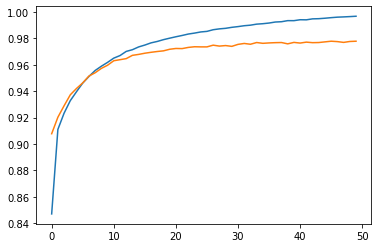

In [10]:
plt.plot(train_accuracy)
plt.plot(test_accuracy)

In [14]:
n_correct = 0
n_total = 0

for (inputs, labels) in train_loader:
    inputs, labels = inputs.to(device).view(-1, 784), labels.to(device)
    
    outputs = model(inputs)
    
    _, predictions = torch.max(outputs, 1)
        
    n_correct += (predictions == labels).sum().item()
    
    n_total += labels.shape[0]
    
print('Train accuracy: {}'.format(n_correct/n_total))

Train accuracy: 0.9979166666666667


In [ ]:
n_correct = 0
n_total = 0

for (inputs, labels) in test_loader:
    inputs, labels = inputs.to(device).view(-1, 784), labels.to(device)
    
    outputs = model(inputs)
    
    _, predictions = torch.max(outputs, 1)
        
    n_correct += (predictions == labels).sum().item()
    
    n_total += labels.shape[0]
    
print('Test accuracy: {}'.format(n_correct/n_total))

Test accuracy: 0.9781
